In [1]:
import numpy as np
from classfunctions import NbodyClass
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

Contents:

[Part 0: Sanity checks](#part0)
- [Potential](#potential)
- [Softening](#softening)
- [Two particles: equal and opposite forces](#2part)

[Part 1: Single particle at rest](#part1)


### Part 0: Sanity Checks <a name="part0"></a>

#### Potential <a name="potential"></a>
The first sanity check we do is checking the potential for one and two particles, in both the periodic and non periodic boundary case, to make sure that we get the potential that we would intuitively expect. (Note: Usually the potential is defined to be everywhere negative, going towards zero at infinity. In my code I left it as positive and simply took the gradient to get the force instead of the negative force.)

The results shown below show exactly what we expect. 

- **Periodic boundary case**: potentials wrap. 
- **Non-periodic boundary case**: padding prevents wrapping.
Note that In the non-periodic boundary case, the green's potential, rather than being zero-padded to avoid wraparound in the convolution operation, is calculated out to 2\*gridlength - 1. This padding using the actual greens potential values provides an accurate non-periodic case. The full padded potential is shown where the wraparound can be seen; to get the desired potential it is clipped to the original grid size, removing the wraparound.

PERIODIC BOUNDARY CASE SINGLE PARTICLE


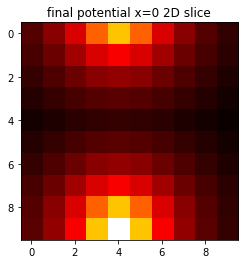

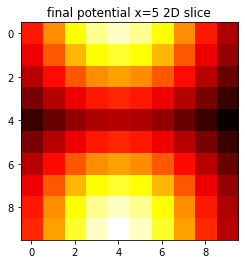

the particles are at  (array([1]), array([9]), array([4]))



 PERIODIC BOUNDARY CASE TWO PARTICLES


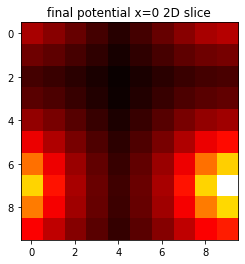

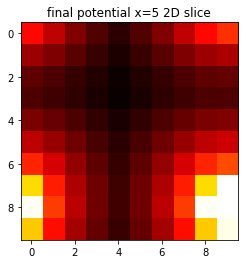

the particles are at  (array([1, 5]), array([7, 8]), array([9, 9]))



 NON-PERIODIC BOUNDARY CASE SINGLE PARTICLE


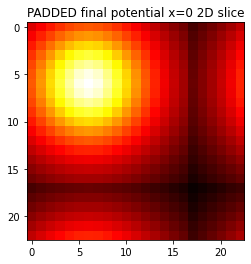

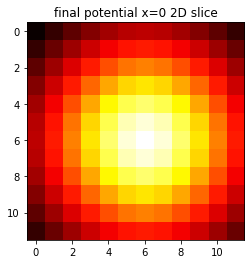

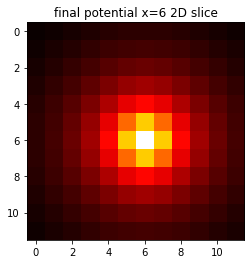

the particles are at  (array([5]), array([6]), array([6]))



 NON-PERIODIC BOUNDARY CASE TWO PARTICLES


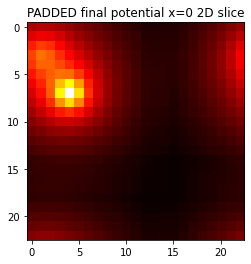

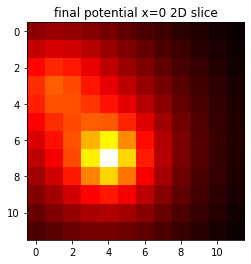

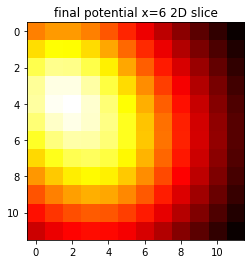

the particles are at  (array([1, 2]), array([7, 3]), array([4, 1]))


0

In [2]:
#SANITY CHECK FOR POTENTIALS.
print('PERIODIC BOUNDARY CASE SINGLE PARTICLE')
num_part = 1
pos = 10*np.random.rand(3, num_part)
v = np.random.rand(3, num_part)
nbody = NbodyClass(pos, v, sgrid=10, periodic=True, soft=1)
nbody.calculate_potential(DEBUG=True)

print('\n\n\n PERIODIC BOUNDARY CASE TWO PARTICLES')
num_part = 2
pos = 10*np.random.rand(3, num_part)
v = np.random.rand(3, num_part)
nbody = NbodyClass(pos, v, sgrid=10, periodic=True, soft=1)
nbody.calculate_potential(DEBUG=True)


print('\n\n\n NON-PERIODIC BOUNDARY CASE SINGLE PARTICLE')
num_part = 1
pos = 10*np.random.rand(3, num_part)
v = np.random.rand(3, num_part)
nbody = NbodyClass(pos, v, sgrid=10, periodic=False, soft=1)
nbody.calculate_potential(DEBUG=True)

print('\n\n\n NON-PERIODIC BOUNDARY CASE TWO PARTICLES')
num_part = 2
pos = 10*np.random.rand(3, num_part)
v = np.random.rand(3, num_part)
nbody = NbodyClass(pos, v, sgrid=10, periodic=False, soft=1)
nbody.calculate_potential(DEBUG=True)

#### Softening<a name="softening"></a>
Because the potential of a particle drops as 1/r, if two particles get too close the velocity can increase excessively and cause wild, unexpected, and unphysical behaviour. To prevent this I used softening to limit how strong the potential (and therefore the force and acceleration) could become.

My method was simple; after calculating the distance between grid cells, I picked a cutoff and said that any distances less than X were cut off and set to X, where X was an input parameter to the Nbody class, with a default at 4. Note that some softening is necessary to change the cell where the particle is currently located from 0 to 1 and is necessary to prevent a divide by zero when calculating the potential.

Shown below is the greens potential (origin at 0,0,0) with no softening, then softening at 3 and 4. The cutoff in the values of the potentials can be seen.

Softening will be discussed more in Part 2 and we will see the effect of softening on two particles locked (or hopefully locked) in a circular orbit.

CALCULATE GREENS POTENTIAL WITH SOFTENING

SOFTENING 1


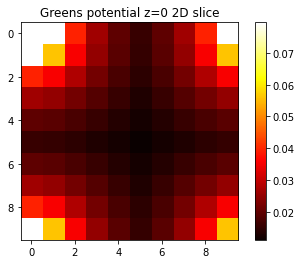


SOFTENING 3


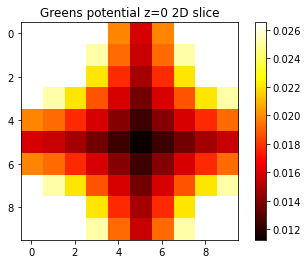


SOFTENING 4


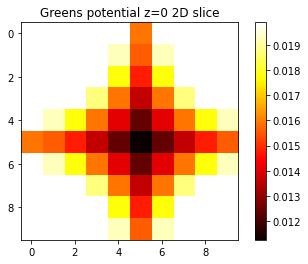

In [3]:
#SANITY CHECK FOR POTENTIALS.
print('CALCULATE GREENS POTENTIAL WITH SOFTENING')
num_part = 1
pos = 10*np.random.rand(3, num_part)
v = np.random.rand(3, num_part)
nbody = NbodyClass(pos, v, sgrid=10, periodic=True, soft=1)
print('\nSOFTENING 1')
nbody.plot_greens()

nbody = NbodyClass(pos, v, sgrid=10, periodic=True, soft=3)
print('\nSOFTENING 3')
nbody.plot_greens()

nbody = NbodyClass(pos, v, sgrid=10, periodic=True, soft=4)
print('\nSOFTENING 4')
nbody.plot_greens()

#### Two particle forces equal and opposite<a name="2part"></a>
The second sanity check we run through is that two particles feel equal and opposite forces. Starting with particles of equal mass 1, we see below that the acceleration is equal and opposite. Note that two different methods of calculating the gradient were implemented; one using numpy's built in 'np.gradient' function. The other involved taking the upwind derivative (the single sided derivative in the direction that the particle is travelling in, to avoid violating CFL).

As shown below the np.gradient method provides more consistent equal and opposite forces for the two particles. 

In [6]:
num_part = 2
pos = 10*np.random.rand(3, num_part)
v = np.zeros( (3, num_part) )

print('ACCELERATIONS WITH NP.GRADIENT')
nbody = NbodyClass(pos, v, sgrid=10, gradient=True)
nbody.take_step()
print('Particle 1 acceleration [x, y, z]: ', nbody.acc[:, 0])
print('Particle 2 acceleration [x, y, z]: ', nbody.acc[:, 1])

print('\nACCELERATIONS WITH UPWIND SINGLE SIDED DERIVATIVE')
nbody = NbodyClass(pos, v, sgrid=10, gradient=False)
nbody.take_step()
print('Particle 1 acceleration [x, y, z]: ', nbody.acc[:, 0])
print('Particle 2 acceleration [x, y, z]: ', nbody.acc[:, 1])

ACCELERATIONS WITH NP.GRADIENT
Particle 1 acceleration [x, y, z]:  [-0.00093182  0.00046225  0.00246866]
Particle 2 acceleration [x, y, z]:  [ 0.00093182 -0.00046225 -0.00246866]

ACCELERATIONS WITH UPWIND SINGLE SIDED DERIVATIVE
Particle 1 acceleration [x, y, z]:  [-0.00107774  0.00024837  0.00283644]
Particle 2 acceleration [x, y, z]:  [ 0.0007859  -0.00067613 -0.00210088]


### Part 1: Single particle at rest <a name="part1"></a>
Here I demonstrate that a single particle at rest remains at rest, for a reasonable number of steps before machine precision begins to creep in.

In [8]:
# Single particle at rest remains at rest. Both periodic and non periodic.
num_part = 1
steps = 10**4
spread = 10

pos = spread*np.random.rand(3, num_part)
v = np.zeros( (3, num_part) )
nbody_one = NbodyClass(pos, v, sgrid=spread, periodic=False)
steps_done = nbody_one.take_n_steps(steps, plots=False)

print('Steps taken: ', steps)
print('Initial position: \n', pos)
print('Final position: \n', nbody_one.get_x())
print('Amount moved: \n', pos-nbody_one.get_x())

Steps taken:  10000
Initial position: 
 [[1.46178314]
 [8.18225366]
 [0.96827579]]
Final position: 
 [[1.46178314]
 [8.18225366]
 [0.96827579]]
Amount moved: 
 [[0.]
 [0.]
 [0.]]
